<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Minimum_Weighted_Subgraph_With_the_Required_Paths_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Weighted Subgraph With the Required Paths

You are given an integer n denoting the number of nodes of a weighted directed graph. The nodes are numbered from 0 to n - 1.

You are also given a 2D integer array edges where edges[i] = [fromi, toi, weighti] denotes that there exists a directed edge from fromi to toi with weight weighti.

Lastly, you are given three distinct integers src1, src2, and dest denoting three distinct nodes of the graph.

Return the minimum weight of a subgraph of the graph such that it is possible to reach dest from both src1 and src2 via a set of edges of this subgraph. In case such a subgraph does not exist, return -1.

A subgraph is a graph whose vertices and edges are subsets of the original graph. The weight of a subgraph is the sum of weights of its constituent edges.

Example 1:

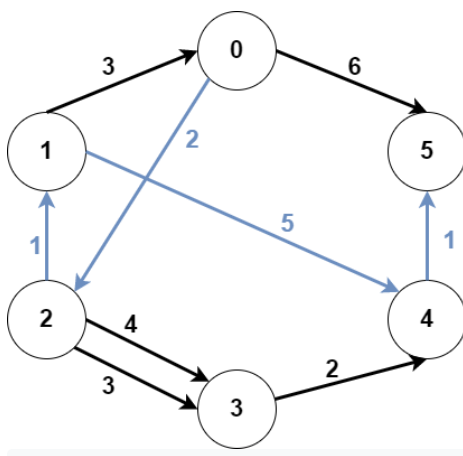



```
Input: n = 6, edges = [[0,2,2],[0,5,6],[1,0,3],[1,4,5],[2,1,1],[2,3,3],[2,3,4],[3,4,2],[4,5,1]], src1 = 0, src2 = 1, dest = 5
Output: 9
Explanation:
The above figure represents the input graph.
The blue edges represent one of the subgraphs that yield the optimal answer.
Note that the subgraph [[1,0,3],[0,5,6]] also yields the optimal answer. It is not possible to get a subgraph with less weight satisfying all the constraints.
```



Example 2:



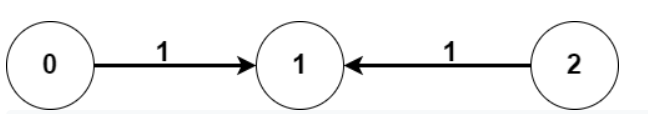



```
Input: n = 3, edges = [[0,1,1],[2,1,1]], src1 = 0, src2 = 1, dest = 2
Output: -1
Explanation:
The above figure represents the input graph.
It can be seen that there does not exist any path from node 1 to node 2, hence there are no subgraphs satisfying all the constraints.
```



Constraints:


```
3 <= n <= 105
0 <= edges.length <= 105
edges[i].length == 3
0 <= fromi, toi, src1, src2, dest <= n - 1
fromi != toi
src1, src2, and dest are pairwise distinct.
1 <= weight[i] <= 105
```



# Solution

idea: find the shortest path for src1 -> x, src2 -> x, x -> destination. x will be common point


1. use Dijkstra for src1
2. use Dijkstra for src2
3. use Dijkstra for dest with reversed graph
4. find distacne = src1_to_x + src2_to_x + x_to_dest for all x and return the minimum one

In [1]:
# Time = O((V + E) * log V)
# Space = O(V)

# V = number of node in graph
# E = number of edge in graph

# use heapq for priority queue
import heapq

class Solution:
    def minimumWeight(self, n: int, edges, src1, src2, dest):
      graph = self.get_adjacency_list(edges)
      reversed_graph = self.get_adjacency_list(edges, True)

      shortest_distances_src1_x = self.dijkstra(graph, src1, n)
      shortest_distances_src2_x = self.dijkstra(graph, src2, n)
      shortest_distances_x_dest = self.dijkstra(reversed_graph, dest, n)

      min_distances = float('inf')
      for i in range(n):
        min_distances = min(min_distances, 
                            shortest_distances_src1_x[i] + 
                            shortest_distances_src2_x[i] +
                            shortest_distances_x_dest[i])
      return min_distances if min_distances != float('inf') else -1
    
    def dijkstra(self, graph, start_node, n):
      fringe = [[0, start_node]]
      shortest_distances = {}
      while len(fringe) > 0:
        distance, node = heapq.heappop(fringe)
        if node in shortest_distances:
          continue
        shortest_distances[node] = distance
        if node not in graph:
          continue
        for child in graph[node]:
          heapq.heappush(fringe, [distance + child[1], child[0]])
      
      shortest_distances_list = []
      for i in range(n):
        if i in shortest_distances:
          shortest_distances_list.append(shortest_distances[i])
        else:
          shortest_distances_list.append(float('inf'))

      return shortest_distances_list
        
    def get_adjacency_list(self, edges, reverse = False):
      adjacency_list = {}
      for idx in range(len(edges)):
          if not reverse:
              start, end, weight = edges[idx]
          else:
              end, start, weight = edges[idx]
          if start not in adjacency_list:
              adjacency_list[start] = []
          adjacency_list[start].append([end, weight])
      
      return adjacency_list

In [2]:
n = 8
edges = [[4,7,24],[1,3,30],[4,0,31],[1,2,31],[1,5,18],[1,6,19],[4,6,25],[5,6,32],[0,6,50]]
src1 = 4
src2 = 1
dest = 6

answer = Solution().minimumWeight(n, edges, src1, src2, dest)
print(answer)

44


In [3]:
n = 3
edges = [[0,1,1],[2,1,1]]
src1 = 0
src2 = 1
dest = 2

answer = Solution().minimumWeight(n, edges, src1, src2, dest)
print(answer)

-1
